In [1]:
import os
import base64
import glob
import re
import json
import numpy as np
import pandas as pd
import cv2
from datetime import datetime, timedelta, date
from PIL import Image
from netCDF4 import Dataset

import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/dhkim/projects/gk2aICT/')
from src.config import (
    LOCAL_GK2A_DIR,
)
from src.variables import (
    VAR2DSKEY,
    FD_VAR2FILE,
)
from src.tools.clip import (
    GK2AFDProcessor,
)
from src.utils import (
    read_gk2a_data
)
from src.tools.cloud_albedo import get_cloud_albedo


In [3]:
def trans_to_out_format(gk2a_array):
    return({
        'dtype': str(gk2a_array.dtype),
        'shape': gk2a_array.shape,
        'data': base64.b64encode(np.ascontiguousarray(gk2a_array)).decode('utf8')
    })

In [26]:
ko_range = {
    'ullatitude': 43.0,
    'ullongitude': 124.0,
    'lrlatitude': 33.0,
    'lrlongitude': 132.0,
}
ea_range = {
    'ullatitude': 53,
    'ullongitude': 77,
    'lrlatitude': 11,
    'lrlongitude': 150,
}
etc_range = {
    'ullatitude': 38.0,
    'ullongitude': 126.0,
    'lrlatitude': 37.0,
    'lrlongitude': 128.0,
}
jeju_range = {
    'ullatitude': 35.0,
    'ullongitude': 125.0,
    'lrlatitude': 32.0,
    'lrlongitude': 128.0,
}


In [27]:
target_range = ko_range

In [28]:
base_path = os.path.join(LOCAL_GK2A_DIR, "fd")

In [29]:
cld_flist = glob.glob(os.path.join(base_path, '*cld*'))
cld_flist.sort()
# sw_vars = ['RSR', 'DSR', 'ASR']

In [30]:
cla_flist = glob.glob(os.path.join(base_path, '*cla*'))
cla_flist.sort()
# cla_vars = ['CA', 'CF', 'CT']

In [31]:
sw_flist = glob.glob(os.path.join(base_path, '*swrad*'))
sw_flist.sort()
# sw_vars = ['RSR', 'DSR', 'ASR']

In [170]:
ii = 0
sw_filename = sw_flist[ii]
obs_datetime = re.findall(string=sw_filename, pattern='[0-9]*.nc')[0][:-3]
cla_filename = [f for f in cla_flist if obs_datetime in f][0]
cld_filename = [f for f in cld_flist if obs_datetime in f][0]

In [171]:
target_range

{'ullatitude': 43.0,
 'ullongitude': 124.0,
 'lrlatitude': 33.0,
 'lrlongitude': 132.0}

In [172]:
data = {}

In [173]:
cla_ds, cla_data = read_gk2a_data('cla', obs_datetime, base_path=LOCAL_GK2A_DIR)
cla_proc = GK2AFDProcessor(size=cla_ds.dimensions['xdim'].size)
for ds_var in VAR2DSKEY['cla']:
    data.update({ds_var: cla_proc.cut_with_latlon(cla_data[ds_var], **target_range)})
data['CF'] = data['CF']/100

In [174]:
cld_ds, cld_data = read_gk2a_data('cld', obs_datetime, base_path=LOCAL_GK2A_DIR)
cld_proc = GK2AFDProcessor(size=cld_ds.dimensions['xdim'].size)
for ds_var in VAR2DSKEY['cld']:
    data.update({ds_var: cld_proc.cut_with_latlon(cld_data[ds_var], **target_range)})

In [175]:
sw_ds, sw_data = read_gk2a_data('swrad', obs_datetime, base_path=LOCAL_GK2A_DIR)
sw_proc = GK2AFDProcessor(size=sw_ds.dimensions['xdim'].size)
for ds_var in VAR2DSKEY['swrad']:
    data.update({ds_var: sw_proc.cut_with_latlon(sw_data[ds_var], **target_range)})

In [176]:
cloud_albedo, data_output = get_cloud_albedo(data)

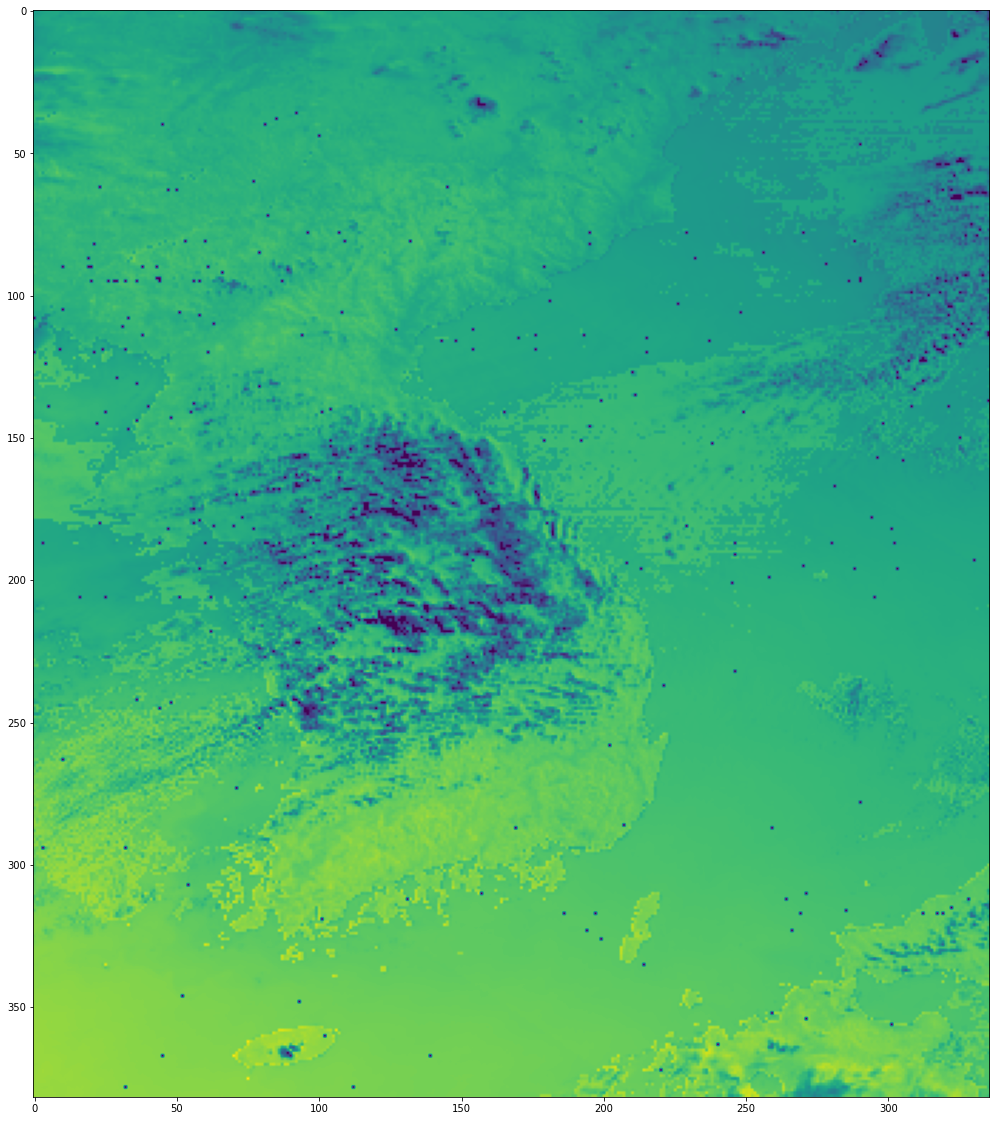

In [177]:
plt.figure(figsize=(20, 20))
plt.imshow(data['DSR'])

SAVE DATA

In [203]:
for kk, vv in data.items():
    # cur_data = data[kk]
    var_dir = os.path.join('./examples/skt_samples', kk.lower())
    os.makedirs(var_dir, exist_ok=True)
    with open(os.path.join(var_dir, f'gk2a_{kk}_{obs_datetime}.json'), 'w') as f:
        json.dump(trans_to_out_format(data[kk]), f)

In [200]:
kk.lower()

'asr'

In [158]:
data

{'CT': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'CLL': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'CA': array([[0.77      , 0.69      , 0.55      , ..., 0.        , 0.        ,
         0.        ],
        [0.75      , 0.75      , 0.58      , ..., 0.        , 0.        ,
         0.        ],
        [0.77      , 0.68      , 0.59999996, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.93      , 0.93      ,
         0

In [241]:
obs_start_str = '202111180550'
obs_end_str = '202111190610'

In [267]:
obs_start = datetime.strptime(obs_start_str, '%Y%m%d%H%M')
obs_end = datetime.strptime(obs_end_str, '%Y%m%d%H%M')

87600.0

In [302]:
obs_end

datetime.datetime(2021, 11, 19, 6, 10)

In [340]:
varname = 'swrad'

In [333]:

for ii in range(0, int((obs_end-obs_start).total_seconds())+600, 600):
    target_obs = (obs_start + timedelta(minutes=ii/60)).strftime('%Y%m%d%H%M')

In [335]:
fname = glob.glob(os.path.join(base_path, f'*cld*{target_obs}.nc'))[0]

In [332]:
os.path.join(base_path, f'*cld*{target_obs}.nc')

'/mnt/sda1/research/data/tmp_gk2a/*cld*202111190600.nc'

In [328]:
cld_flist

[]

In [281]:
(obs_end-obs_start)

In [21]:
with open('data.json', 'w') as f:
    json.dump(data, f)

## read

In [195]:
with open(f'gk2a_{var_name}_{obs_datetime}.json', 'r') as f:
    loaded_output = json.load(f)

In [345]:
os.getcwd()

'/home/dhkim/projects/gk2aICT'

In [361]:
with open('./examples/skt_samples/swrad/gk2a_dsr_202111180610.json', 'r') as f:
    loaded_output = json.load(f)

In [362]:
loaded_output.keys()

dict_keys(['dtype', 'shape', 'data'])

In [363]:
restored = np.frombuffer(    
    base64.decodebytes(
        dictionary['data'].encode('utf-8')
    ), dtype=loaded_output['dtype']
).reshape(output['shape'])


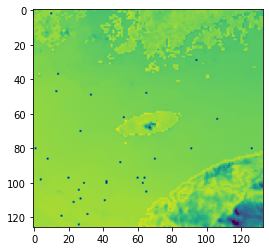

In [ ]:
plt.imshow(restored)

## LATLONS

In [179]:
arr = data["CA"].copy()

In [180]:
lr_lon = 132
lr_lat = 33
ul_lon = 124
ul_lat = 43

In [181]:
ul = tuple(map(np.floor, cla_proc.rowcol_from_latlon(ul_lat, ul_lon)))

In [182]:
lr = tuple(map(np.ceil, cla_proc.rowcol_from_latlon(lr_lat, lr_lon)))

In [183]:
x = np.linspace(int(ul[1]),int(lr[1]), num=arr.shape[1]) # longitude
y = np.linspace(int(ul[0]),int(lr[0]), num=arr.shape[0]) # latitude

In [184]:
X, Y = np.meshgrid(x,y)
yy, xx = cla_proc.latlon_from_rowcol(Y, X)

## draw on basemap

In [185]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
data.keys()

dict_keys(['CT', 'CLL', 'CA', 'CF', 'CLD', 'RSR', 'DSR', 'ASR'])

In [187]:
arr = data["DSR"].copy()

In [188]:
xx_img = xx[::-1].reshape(-1)
yy_img = yy.reshape(-1)
arr_img = arr[::-1].reshape(-1)

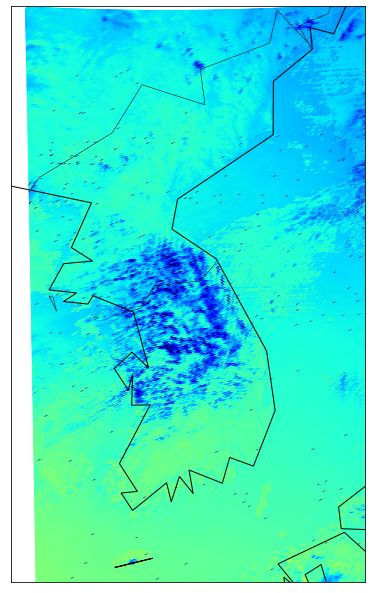

In [200]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

m = Basemap(
    llcrnrlon=ul_lon,
    llcrnrlat=lr_lat,
    urcrnrlon=lr_lon,
    urcrnrlat=ul_lat,
    rsphere=(6378137.00, 6356752.3142),
    # resolution='h',
    area_thresh=1000.,
    epsg=5181,
    lat_0=37.35,
    lon_0=126.58,
    ax=ax
)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
xx_m, yy_m = m(xx, yy_img)
m.scatter(xx_m, yy_m, c=arr, cmap='jet', vmin=0, vmax=900)
plt.show()